# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import random as rnd

### Wczytanie danych

Poniższy kod wczytuje do zmiennej `eruptions_data` dane z przygotowanego wcześniej pliku eruptions_data.pkl.
Wyświetl przygotowaną tablicę.

In [3]:
eruptions_data = pd.read_pickle("eruption_data.pkl")
eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2.0,2022,10.0,21.0,2022.0,12.0,19.0,Observations,Reported
22481,Taal,Confirmed,1.0,2022,10.0,5.0,2022.0,10.0,29.0,Observations,Reported
22458,Turrialba,Confirmed,1.0,2022,7.0,17.0,2022.0,7.0,17.0,Observations,Reported
22453,Ulawun,Confirmed,2.0,2022,6.0,2.0,2022.0,6.0,2.0,Observations,Reported
22454,Raung,Confirmed,2.0,2022,5.0,14.0,2022.0,9.0,27.0,Observations,Satellite (infrared)
...,...,...,...,...,...,...,...,...,...,...,...
14556,Tongariro,Confirmed,5.0,-9650,NaN,NaN,NaN,NaN,NaN,Correlation,Tephrochronology
21101,Craters of the Moon,Confirmed,0.0,-10060,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
22141,Igwisi Hills,Confirmed,1.0,-10450,NaN,NaN,NaN,NaN,NaN,Isotopic,Cosmic Ray Exposure


In [9]:
vei_data_1 = eruptions_data.value_counts(subset='VEI').to_frame().sort_index().rename(columns = {'count':'f'})
vei_data_1['cf'] = vei_data_1['f'].cumsum()
vei_data_1['rf'] = vei_data_1['f'] / vei_data_1['f'].sum()
vei_data_1['crf'] = vei_data_1['cf'] / vei_data_1['f'].sum()

vei_data_2 = eruptions_data[eruptions_data['Eruption Category'] == 'Confirmed'].value_counts(subset='VEI').to_frame().sort_index().rename(columns = {'count':'f'})
vei_data_2['cf'] = vei_data_2['f'].cumsum()
vei_data_2['rf'] = vei_data_2['f'] / vei_data_2['f'].sum()
vei_data_2['crf'] = vei_data_2['cf'] / vei_data_2['f'].sum()

vei_data_3 = eruptions_data[eruptions_data['Eruption Category'] == 'Uncertain'].value_counts(subset='VEI').to_frame().sort_index().rename(columns = {'count':'f'})
vei_data_3['cf'] = vei_data_3['f'].cumsum()
vei_data_3['rf'] = vei_data_3['f'] / vei_data_3['f'].sum()
vei_data_3['crf'] = vei_data_3['cf'] / vei_data_3['f'].sum()

### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

> Indeks: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej.

> Kolumny: 2-poziomowe nagłówki, dla każdego z nagłówków 1 poziomu powtarza się cały zestaw nagłówków 2 poziomu

>> Nagłówki 1 poziomu: All, Confirmed Eruption, Uncertain Eruption </br>
>> Całość danych oraz grupy wyznaczone na podstawie kolumny Eruption category</br>

>> Nagłówki 2 poziomu: f, cf, rf, crf </br>
>> Zliczenia poszczególnych kategorii (ang. frequency, absolute frequency), zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),  rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency), crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency)

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [28]:
column1=["All eruptions", "Confirmed Eruptions", "Uncertain Eruptions"]
column2=["f", "cf", "rf", "crf"]
vei_data=pd.DataFrame(columns=pd.MultiIndex.from_product([column1, column2]), index=sorted(eruptions_data["VEI"].unique().astype('int32')))
vei_data.index.name="VEI"
vei_data["All eruptions"]=vei_data_1
vei_data["Confirmed Eruptions"]=vei_data_2
vei_data["Uncertain Eruptions"]=vei_data_3
vei_data

All eruptions                           Confirmed Eruptions        \
                f    cf        rf       crf                   f    cf   
VEI                                                                     
0            1007  1007  0.121545  0.121545                 803   803   
1            1384  2391  0.167049  0.288594                1227  2030   
2            3991  6382  0.481714  0.770308                3727  5757   
3            1152  7534  0.139046  0.909354                1133  6890   
4             511  8045  0.061678  0.971032                 510  7400   
5             180  8225  0.021726  0.992758                 180  7580   
6              53  8278  0.006397  0.999155                  53  7633   
7               7  8285  0.000845  1.000000                   7  7640   

                        Uncertain Eruptions                             
           rf       crf                   f     cf        rf       crf  
VEI                                                                     
0    0.105105  0.105105               204.0  204.0  0.316279  0.316279  
1    0.160602  0.265707               157.0  361.0  0.243411  0.559690  
2    0.487827  0.753534               264.0  625.0  0.409302  0.968992  
3    0.148298  0.901832                19.0  644.0  0.029457  0.998450  
4    0.066754  0.968586                 1.0  645.0  0.001550  1.000000  
5    0.023560  0.992147                 NaN    NaN       NaN       NaN  
6    0.006937  0.999084                 NaN    NaN       NaN       NaN  
7    0.000916  1.000000                 NaN    NaN       NaN       NaN

In [29]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert set(list(vei_data.columns.levels[1])) == set(['f', 'cf', 'rf', 'crf'])
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (25,10))


### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

> Indeks: 2-poziomowe nagłówki </br>

>> Nagłówki 1 poziomu: Kategorie dowodów </br>

>> Nagłówki 2 poziomu: Metody, które dostarczyły dowodów </br>

> Kolumny: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [59]:
evidence_data= eruptions_data.pivot_table(index=['Evidence Type', "Evidence Method"], values="Volcano Name", columns="VEI", aggfunc="count").fillna(0)
evidence_data["All"]=evidence_data.sum(axis=1)
evidence_data

VEI                                   0.0     1.0     2.0    3.0    4.0   5.0  \
Evidence Type Evidence Method                                                   
Correlation   Anthropology            4.0     1.0     5.0    2.0    6.0   1.0   
              Magnetism              34.0     0.0     5.0    0.0    2.0   0.0   
              Tephrochronology       71.0    16.0   122.0  124.0  103.0  22.0   
Isotopic      14C (calibrated)       41.0    12.0    49.0  100.0  105.0  70.0   
              14C (uncalibrated)    125.0     7.0    34.0   54.0   91.0  41.0   
              Ar/Ar                  12.0     1.0     0.0    0.0    1.0   1.0   
              Cosmic Ray Exposure    20.0     1.0     0.0    0.0    1.0   0.0   
              K/Ar                   10.0     0.0     0.0    1.0    0.0   0.0   
              Uranium-series         24.0     0.0     0.0    0.0    0.0   0.0   
Observations  Aviation                0.0     1.0     0.0    0.0    0.0   0.0   
              Hydrophonic            68.0     3.0     0.0    0.0    0.0   0.0   
              Photo / Video           1.0     1.0     1.0    0.0    0.0   0.0   
              Reported              376.0  1200.0  3430.0  837.0  194.0  42.0   
              Satellite (infrared)    1.0     0.0     1.0    1.0    0.0   0.0   
              Satellite (visual)      0.0     2.0     3.0    1.0    0.0   0.0   
              Seismicity             15.0     0.0     1.0    0.0    0.0   0.0   
Radiogenic    Fission track           0.0     0.0     0.0    1.0    0.0   0.0   
              Thermoluminescence      1.0     0.0     0.0    0.0    1.0   0.0   
Sidereal      Dendrochronology        0.0     0.0     0.0    1.0    2.0   3.0   
              Ice Core                0.0     0.0     3.0    0.0    3.0   0.0   
              Varve Count             0.0     1.0    66.0    8.0    1.0   0.0   
Uncertain     Unspecified           204.0   138.0   271.0   22.0    1.0   0.0   

VEI                                  6.0  7.0     All  
Evidence Type Evidence Method                          
Correlation   Anthropology           0.0  0.0    19.0  
              Magnetism              0.0  0.0    41.0  
              Tephrochronology       5.0  0.0   463.0  
Isotopic      14C (calibrated)      21.0  3.0   401.0  
              14C (uncalibrated)    19.0  1.0   372.0  
              Ar/Ar                  0.0  0.0    15.0  
              Cosmic Ray Exposure    0.0  0.0    22.0  
              K/Ar                   0.0  0.0    11.0  
              Uranium-series         0.0  0.0    24.0  
Observations  Aviation               0.0  0.0     1.0  
              Hydrophonic            0.0  0.0    71.0  
              Photo / Video          0.0  0.0     3.0  
              Reported               7.0  1.0  6087.0  
              Satellite (infrared)   0.0  0.0     3.0  
              Satellite (visual)     0.0  0.0     6.0  
              Seismicity             0.0  0.0    16.0  
Radiogenic    Fission track          0.0  0.0     1.0  
              Thermoluminescence     0.0  0.0     2.0  
Sidereal      Dendrochronology       0.0  0.0     6.0  
              Ice Core               1.0  2.0     9.0  
              Varve Count            0.0  0.0    76.0  
Uncertain     Unspecified            0.0  0.0   636.0

In [50]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

<Axes: xlabel='VEI', ylabel='Start Year'>

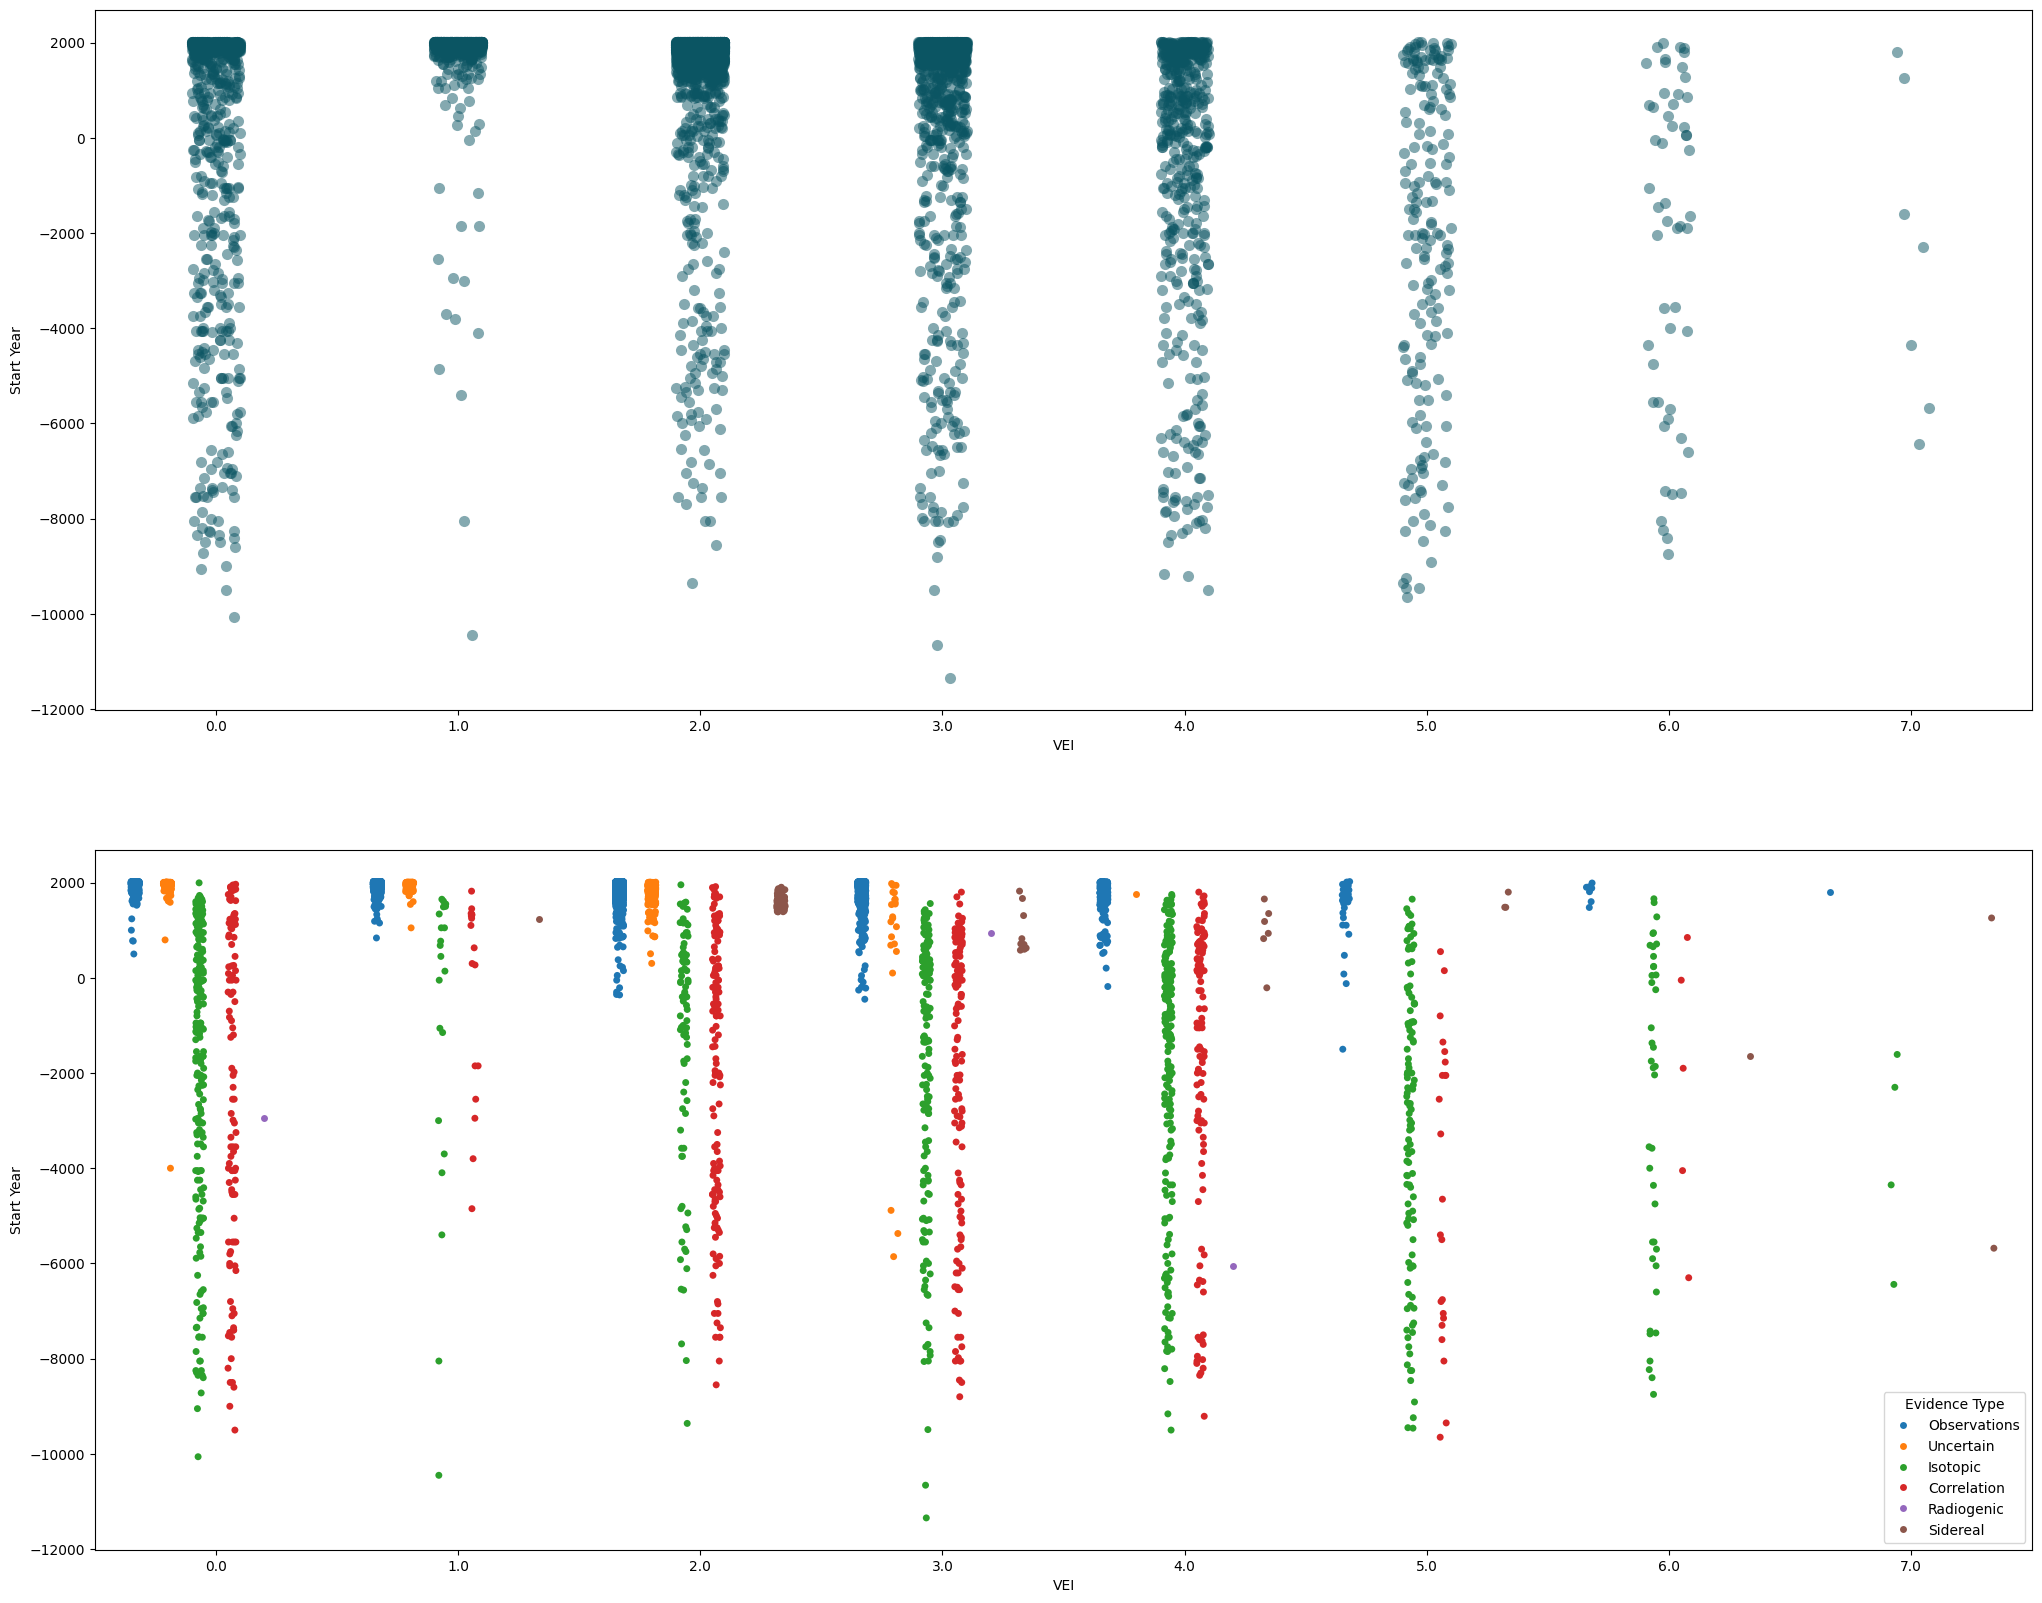

In [67]:
fig,ax=plt.subplots(2,1, figsize = (25,20))
sns.stripplot(eruptions_data, y="Start Year", x="VEI", ax=ax[0], alpha=0.5, size=8, color="#0B5563")
sns.stripplot(eruptions_data, y="Start Year", x="VEI", ax=ax[1], hue="Evidence Type", dodge=True)